# Mini Project - Card Transcations


**Question 1: Load**

Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

Please describe the structure of the data. Number of records and fields in each record?
Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

**Question 2: Plot**

Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
Report any structure you find and any hypotheses you have about that structure.

**Question 3: Data Wrangling - Duplicate Transactions**

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

Can you programmatically identify reversed and multi-swipe transactions?
What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
Did you find anything interesting about either kind of transaction?

**Question 4: Model**

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
Provide an estimate of performance using an appropriate sample, and show your work.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
with open('/content/drive/My Drive/DS_Jul_22/data/transactions.txt') as f:
    for x in f :      
      print(x.rstrip())

{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-08-13T14:27:32", "transactionAmount": 98.55, "merchantName": "Uber", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "02", "posConditionCode": "01", "merchantCategoryCode": "rideshare", "currentExpDate": "06/2023", "accountOpenDate": "2015-03-14", "dateOfLastAddressChange": "2015-03-14", "cardCVV": "414", "enteredCVV": "414", "cardLast4Digits": "1803", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-10-11T05:05:54", "transactionAmount": 74.51, "merchantName": "AMC #191138", "acqCountry": "US", "merchan

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{"accountNumber": "380503025", "customerId": "380503025", "creditLimit": 2500.0, "availableMoney": 307.55, "currentBalance": 2192.45, "transactionDateTime": "2016-10-30T15:19:42", "transactionAmount": 280.61, "merchantName": "Lyft", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "09", "posConditionCode": "01", "merchantCategoryCode": "rideshare", "currentExpDate": "09/2026", "accountOpenDate": "2008-06-29", "dateOfLastAddressChange": "2016-07-03", "cardCVV": "504", "enteredCVV": "504", "cardLast4Digits": "6467", "transactionType": "PURCHASE", "echoBuffer": "", "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "380503025", "customerId": "380503025", "creditLimit": 2500.0, "availableMoney": 789.85, "currentBalance": 1710.15, "transactionDateTime": "2016-10-31T04:08:44", "transactionAmount": 288.0, "merchantName": "discount.c

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{"accountNumber": "345663377", "customerId": "345663377", "creditLimit": 15000.0, "availableMoney": 12579.48, "currentBalance": 2420.52, "transactionDateTime": "2016-11-12T18:44:33", "transactionAmount": 129.59, "merchantName": "Fresh Flowers", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "80", "posConditionCode": "01", "merchantCategoryCode": "online_gifts", "currentExpDate": "10/2021", "accountOpenDate": "2006-11-24", "dateOfLastAddressChange": "2016-02-17", "cardCVV": "816", "enteredCVV": "816", "cardLast4Digits": "465", "transactionType": "PURCHASE", "echoBuffer": "", "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "345663377", "customerId": "345663377", "creditLimit": 15000.0, "availableMoney": 12449.89, "currentBalance": 2550.11, "transactionDateTime": "2016-11-12T20:12:56", "transactionAmount": 85.69, "merchantN

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{"accountNumber": "604878742", "customerId": "604878742", "creditLimit": 7500.0, "availableMoney": 4195.58, "currentBalance": 3304.42, "transactionDateTime": "2016-07-09T19:15:26", "transactionAmount": 64.48, "merchantName": "Downtown Pub", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "02", "posConditionCode": "01", "merchantCategoryCode": "food", "cardPresent": true, "currentExpDate": "12/2022", "accountOpenDate": "2015-12-25", "dateOfLastAddressChange": "2016-04-07", "cardCVV": "227", "enteredCVV": "227", "cardLast4Digits": "9100", "transactionType": "PURCHASE", "echoBuffer": "", "merchantCity": "", "merchantState": "", "merchantZip": "", "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "604878742", "customerId": "604878742", "creditLimit": 7500.0, "availableMoney": 4131.1, "currentBalance": 3368.9, "transactionDateTime": "2016-07-10T17:49:48", "transactionAmount": 131.54, "merchantName": "Ray's Fr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{"accountNumber": "352034651", "customerId": "352034651", "creditLimit": 250.0, "availableMoney": 250.0, "transactionDateTime": "2016-11-05T16:27:13", "transactionAmount": 263.28, "merchantName": "AMC #606218", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "02", "posConditionCode": "01", "merchantCategoryCode": "entertainment", "cardPresent": true, "currentExpDate": "04/2032", "accountOpenDate": "2015-12-22", "dateOfLastAddressChange": "2016-10-10", "cardCVV": "150", "enteredCVV": "150", "cardLast4Digits": "5377", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "352034651", "customerId": "352034651", "creditLimit": 250.0, "availableMoney": 164.24, "currentBalance": 85.76, "transactionDateTime": "2016-11-05T21:46:27", "transactionAmount": 78.82, "merchantName": "AMC #1458

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: ignored

In [ ]:
import json
data = []
with open('/content/drive/My Drive/DS_Jul_22/data/transactions.txt') as f:
    for x in f:
        data.append(json.loads(x))

df = pd.DataFrame(data)

del data

In [ ]:
df.head()

accountNumber customerId  ...  expirationDateKeyInMatch  isFraud
0     737265056  737265056  ...                     False    False
1     737265056  737265056  ...                     False    False
2     737265056  737265056  ...                     False    False
3     737265056  737265056  ...                     False    False
4     830329091  830329091  ...                     False    False

[5 rows x 29 columns]

In [ ]:
df.shape

(786363, 29)

In [ ]:
df.describe(include='all')

accountNumber customerId  ...  expirationDateKeyInMatch  isFraud
count         786363     786363  ...                    786363   786363
unique          5000       5000  ...                         2        2
top        380680241  380680241  ...                     False    False
freq           32850      32850  ...                    785320   773946
mean             NaN        NaN  ...                       NaN      NaN
std              NaN        NaN  ...                       NaN      NaN
min              NaN        NaN  ...                       NaN      NaN
25%              NaN        NaN  ...                       NaN      NaN
50%              NaN        NaN  ...                       NaN      NaN
75%              NaN        NaN  ...                       NaN      NaN
max              NaN        NaN  ...                       NaN      NaN

[11 rows x 29 columns]

In [ ]:
df['acqCountry'].value_counts()

US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

In [ ]:
df['merchantCountryCode'].value_counts()

US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: merchantCountryCode, dtype: int64

In [ ]:
df['merchantName'].value_counts()

Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
EZ Wireless #149871                  1
Curves #849125                       1
TMobile Wireless #602341             1
Name: merchantName, Length: 2490, dtype: int64

In [ ]:
df['posEntryMode'].value_counts()

05    315035
09    236481
02    195934
90     19576
80     15283
        4054
Name: posEntryMode, dtype: int64

In [ ]:
df['posConditionCode'].value_counts()

01    628787
08    149634
99      7533
         409
Name: posConditionCode, dtype: int64

In [ ]:
df['merchantCategoryCode'].value_counts()

online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64

In [ ]:
df[df['cardCVV'] != df['enteredCVV']]

accountNumber customerId  ...  expirationDateKeyInMatch  isFraud
19         574788567  574788567  ...                     False    False
100        924729945  924729945  ...                     False    False
101        924729945  924729945  ...                     False    False
211        984504651  984504651  ...                     False    False
261        984504651  984504651  ...                     False    False
...              ...        ...  ...                       ...      ...
786154     638498773  638498773  ...                     False    False
786194     638498773  638498773  ...                     False    False
786228     638498773  638498773  ...                     False    False
786265     732852505  732852505  ...                     False    False
786311     732852505  732852505  ...                     False    False

[7015 rows x 29 columns]

In [ ]:
df['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

In [ ]:
df['isFraud'].mean()

0.01579041740264992

In [ ]:
df[df['cardCVV'] != df['enteredCVV']]['isFraud'].mean()

0.02893799002138275

In [ ]:
 df['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

In [ ]:
df[df['transactionType'] == 'ADDRESS_VERIFICATION']['isFraud'].mean()

0.005751400664385939

In [ ]:
df[df['transactionType'] == 'REVERSAL']['isFraud'].mean()

0.01659853223661528

In [ ]:
df['cardPresent'].mean()

0.4487342359699019

In [ ]:
df[df['cardPresent']]['isFraud'].mean()

0.009791196708117483

In [ ]:
df[~df['cardPresent']]['isFraud'].mean()

0.020673825534319887

In [ ]:
df[df['transactionAmount'] == 0]['isFraud'].mean()

0.005489313835770528

In [ ]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
df.drop(axis = 1,
        columns = ['echoBuffer', 'merchantCity','merchantState', 'merchantZip','posOnPremises',
       'recurringAuthInd'],
        inplace = True
        )

In [ ]:
df.shape

(786363, 23)

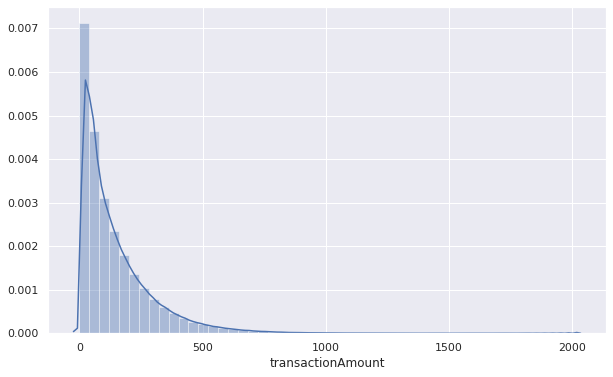

In [ ]:
sns.distplot(df['transactionAmount'])

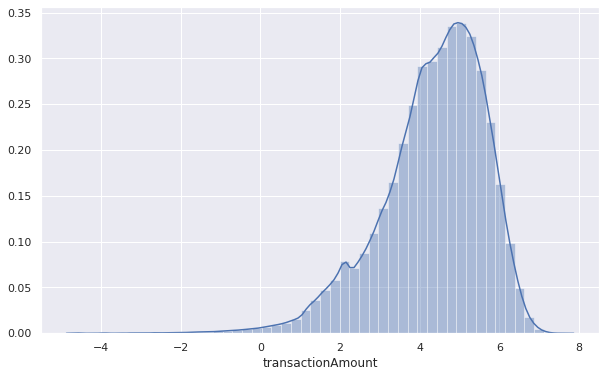

In [ ]:
sns.distplot(np.log(df[df['transactionAmount'] > 0 ]['transactionAmount']))

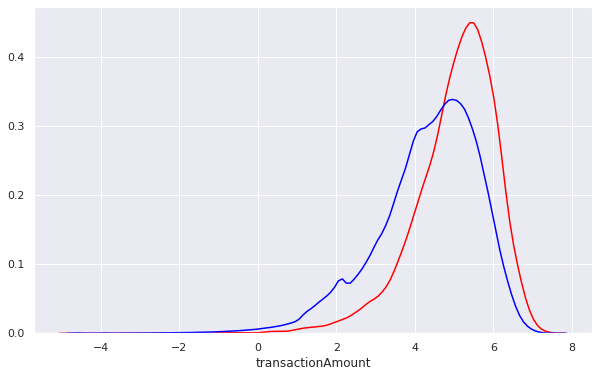

In [ ]:
sns.distplot(np.log(df[(df['transactionAmount'] > 0) & (df['isFraud']) ]['transactionAmount']), hist= False, color = 'red')
sns.distplot(np.log(df[(df['transactionAmount'] > 0) & (~df['isFraud']) ]['transactionAmount']), hist= False, color = 'blue')

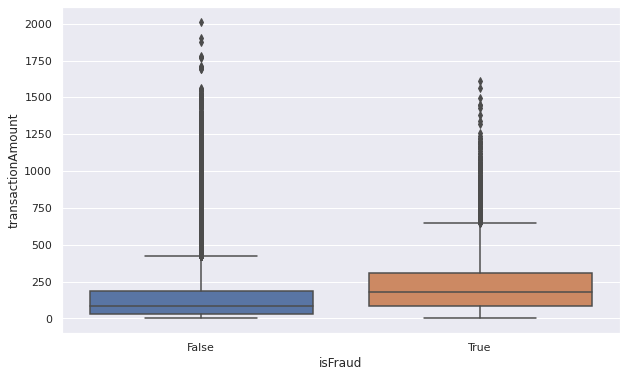

In [ ]:
sns.boxplot(x='isFraud', y='transactionAmount', data = df)

In [ ]:
df[df['transactionType'] == 'REVERSAL']

accountNumber customerId  ...  expirationDateKeyInMatch  isFraud
39         574788567  574788567  ...                     False    False
73         574788567  574788567  ...                     False    False
101        924729945  924729945  ...                     False    False
133        984504651  984504651  ...                     False    False
156        984504651  984504651  ...                     False    False
...              ...        ...  ...                       ...      ...
786106     899818521  899818521  ...                     False    False
786120     638498773  638498773  ...                     False    False
786219     638498773  638498773  ...                     False    False
786225     638498773  638498773  ...                     False    False
786301     732852505  732852505  ...                     False    False

[20303 rows x 23 columns]

In [ ]:
df[(df['accountNumber'] == '574788567') & (df['transactionAmount'] == 215.13)	]

accountNumber customerId  ...  expirationDateKeyInMatch  isFraud
38     574788567  574788567  ...                     False    False
39     574788567  574788567  ...                     False    False

[2 rows x 23 columns]

First find all reversal:

In [ ]:
df2 = df[df.transactionType == 'REVERSAL'][['accountNumber', 'transactionAmount', 'cardLast4Digits']]

In [ ]:
df2

accountNumber  transactionAmount cardLast4Digits
39         574788567             215.13            8522
73         574788567               3.87            4219
101        924729945             168.57            9459
133        984504651             450.74            8332
156        984504651              81.73            8332
...              ...                ...             ...
786106     899818521              10.05            3424
786120     638498773             201.79             321
786219     638498773              86.14            4635
786225     638498773              49.39            4635
786301     732852505              22.55            3388

[20303 rows x 3 columns]

In [ ]:
 df[['accountNumber', 'transactionAmount', 'cardLast4Digits', 'transactionType', 'transactionDateTime']].reset_index()

index accountNumber  ...  transactionType  transactionDateTime
0            0     737265056  ...         PURCHASE  2016-08-13T14:27:32
1            1     737265056  ...         PURCHASE  2016-10-11T05:05:54
2            2     737265056  ...         PURCHASE  2016-11-08T09:18:39
3            3     737265056  ...         PURCHASE  2016-12-10T02:14:50
4            4     830329091  ...         PURCHASE  2016-03-24T21:04:46
...        ...           ...  ...              ...                  ...
786358  786358     732852505  ...         PURCHASE  2016-12-22T18:44:12
786359  786359     732852505  ...         PURCHASE  2016-12-25T16:20:34
786360  786360     732852505  ...         PURCHASE  2016-12-27T15:46:24
786361  786361     732852505  ...         PURCHASE  2016-12-29T00:30:55
786362  786362     732852505  ...         PURCHASE  2016-12-30T20:10:29

[786363 rows x 6 columns]

In [ ]:
df3 = df[['accountNumber', 'transactionAmount', 'cardLast4Digits', 'transactionType', 'transactionDateTime']].reset_index().\
      merge(df2, on=['accountNumber', 'cardLast4Digits', 'transactionAmount'], how = 'inner').\
      sort_values(['accountNumber', 'transactionAmount','transactionDateTime'])

In [ ]:
df3

index accountNumber  ...  transactionType  transactionDateTime
62575  541963     100088067  ...         PURCHASE  2016-11-20T07:57:05
62576  541964     100088067  ...         REVERSAL  2016-11-20T08:00:04
7964    87919     100328049  ...         PURCHASE  2016-01-15T20:34:35
7965    87920     100328049  ...         REVERSAL  2016-01-15T20:36:18
7966    87935     100328049  ...         PURCHASE  2016-03-24T22:57:15
...       ...           ...  ...              ...                  ...
75062  670026     999283629  ...         PURCHASE  2016-04-09T12:56:43
75063  670027     999283629  ...         PURCHASE  2016-04-09T12:56:52
75064  670038     999283629  ...         REVERSAL  2016-05-01T05:42:19
75067  670084     999283629  ...         PURCHASE  2016-09-15T06:35:31
75068  670091     999283629  ...         REVERSAL  2016-10-03T11:08:21

[82968 rows x 6 columns]

In [ ]:
df4 = df3.groupby(['accountNumber', 'transactionAmount', 'cardLast4Digits']).tail(2)

In [ ]:
df4['index']

62575    541963
62576    541964
7964      87919
7965      87920
7966      87935
          ...  
75070    670109
75063    670027
75064    670038
75067    670084
75068    670091
Name: index, Length: 38378, dtype: int64

In [ ]:
df.iloc[541963:541965,:]

accountNumber customerId  ...  expirationDateKeyInMatch  isFraud
541963     100088067  100088067  ...                     False    False
541964     100088067  100088067  ...                     False    False

[2 rows x 23 columns]

In [ ]:
df['expirationDateKeyInMatch'].value_counts()

False    785320
True       1043
Name: expirationDateKeyInMatch, dtype: int64

In [ ]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
df['cvvIsSame'] = df['cardCVV'] == df['enteredCVV']

In [ ]:
df

accountNumber customerId  ...  isFraud  cvvIsSame
0          737265056  737265056  ...    False       True
1          737265056  737265056  ...    False       True
2          737265056  737265056  ...    False       True
3          737265056  737265056  ...    False       True
4          830329091  830329091  ...    False       True
...              ...        ...  ...      ...        ...
786358     732852505  732852505  ...    False       True
786359     732852505  732852505  ...    False       True
786360     732852505  732852505  ...    False       True
786361     732852505  732852505  ...    False       True
786362     732852505  732852505  ...    False       True

[786363 rows x 24 columns]

In [ ]:
df1 = df[['creditLimit', 'availableMoney','transactionAmount', 'merchantCategoryCode',
   'merchantCountryCode',  'posEntryMode','currentBalance', 'cardPresent', 'cvvIsSame']]

In [ ]:
df2 = pd.get_dummies(columns= ['merchantCategoryCode','merchantCountryCode', 'posEntryMode' ], data = df1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2,
                                                    df['isFraud'],
                                                    stratify =  df['isFraud'],
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
X_train.shape

(550454, 36)

In [ ]:
X_test.shape

(235909, 36)

In [ ]:
X_train

creditLimit  availableMoney  ...  posEntryMode_80  posEntryMode_90
275932       7500.0         2530.81  ...                0                0
495905      15000.0         7986.22  ...                0                0
420006      10000.0         8285.67  ...                0                0
763321       7500.0         1549.96  ...                0                0
373629       1000.0          237.01  ...                0                0
...             ...             ...  ...              ...              ...
481506      15000.0        14951.68  ...                0                0
515466       1000.0           68.67  ...                0                0
80867         500.0          133.01  ...                0                0
719766       2500.0          409.38  ...                0                0
593313      10000.0         8299.23  ...                0                0

[550454 rows x 36 columns]

In [ ]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = clf_lr.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_lr)

0.984205774260414

In [ ]:
metrics.precision_score(y_test, y_pred_lr)

0.0

In [ ]:
metrics.recall_score(y_test, y_pred_lr)

0.0

In [ ]:
y_pred_lr

array([False, False, False, ..., False, False, False])

In [ ]:
y_pred_lr_p = clf_lr.predict_proba(X_test)

In [ ]:
y_pred_lr_p

array([[0.99272092, 0.00727908],
       [0.98947382, 0.01052618],
       [0.99182648, 0.00817352],
       ...,
       [0.97896813, 0.02103187],
       [0.98803515, 0.01196485],
       [0.98700129, 0.01299871]])

In [ ]:
y_pred_lr_p[:,1]

array([0.00727908, 0.01052618, 0.00817352, ..., 0.02103187, 0.01196485,
       0.01299871])

In [ ]:
y_pred_lr = np.where(y_pred_lr_p[:,1] > 0.03, 1, 0)

In [ ]:
y_pred_lr.sum()

17275

In [ ]:
metrics.accuracy_score(y_test, y_pred_lr)

0.918044669766732

In [ ]:
metrics.precision_score(y_test, y_pred_lr)

0.04821997105643994

In [ ]:
metrics.recall_score(y_test, y_pred_lr)

0.22362416107382552

In [ ]:
metrics.confusion_matrix(y_test, y_pred_lr)

array([[215742,  16442],
       [  2892,    833]])

Logistic: ROC AUC=0.696


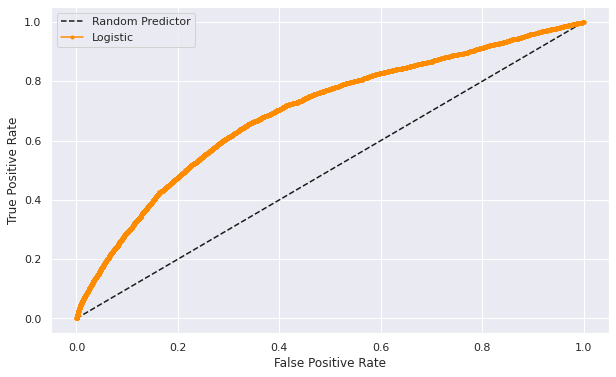

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
 
lr_probs = clf_lr.predict_proba(X_test)
 
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
 
# calculate scores  Area Under Cruve
lr_auc = roc_auc_score(y_test,lr_probs)
 
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
 
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test,lr_probs)
 
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], 'k--',label='Random Predictor')  # draw diag
plt.plot(fpr, tpr, marker='.', color='darkorange',label='Logistic') # draw ROC
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100, 
                        learning_rate=0.1,
                        max_depth=6)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGB: ROC AUC=0.776


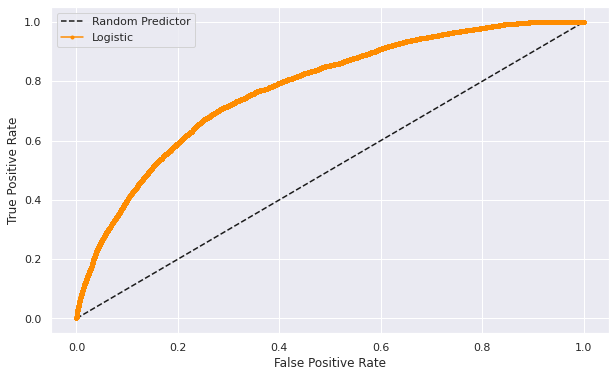

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
 
lr_probs = xgb_clf.predict_proba(X_test)
 
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
 
# calculate scores  Area Under Cruve
lr_auc = roc_auc_score(y_test,lr_probs)
 
# summarize scores
print('XGB: ROC AUC=%.3f' % (lr_auc))
 
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test,lr_probs)
 
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], 'k--',label='Random Predictor')  # draw diag
plt.plot(fpr, tpr, marker='.', color='darkorange',label='Logistic') # draw ROC
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(n_estimators = 500, 
                         subsample=0.8,
                         learning_rate = 0.2
                         )
lgb_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

LGBM: ROC AUC=0.762


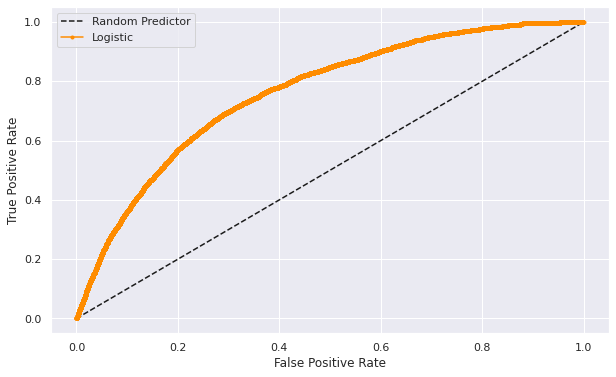

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
 
lr_probs = lgb_clf.predict_proba(X_test)
 
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
 
# calculate scores  Area Under Cruve
lr_auc = roc_auc_score(y_test,lr_probs)
 
# summarize scores
print('LGBM: ROC AUC=%.3f' % (lr_auc))
 
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test,lr_probs)
 
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], 'k--',label='Random Predictor')  # draw diag
plt.plot(fpr, tpr, marker='.', color='darkorange',label='Logistic') # draw ROC
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()